# Introduction

Early diagnosis of diabetes is important to prevent the onset of complications. In this project, I will analyze the survey data on health indicators that may be associated with diabetes.

There are two main aims of this project:
- to find out the indicators that are most associated with diabetes
- to build a model to predict diabetes

I will start by exploring the data in a balanced dataset and then build a model to predict diabetes. I will compare the performance of the model and apply hyperparameter tuning to improve the model performance. The final model will be used to predict diabetes in an imbalanced test dataset.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



sns.set_style('white')
sns.set_palette('Set2')

# Load and clean data

In [ ]:
# train data
train = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# test data
test = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
# the train and test data should have the same columns, let's check
print(f"train shape: {train.shape}")
print(f"test shape: {test.shape}")

# check the columns
print(train.columns == test.columns)


train shape: (70692, 22)
test shape: (253680, 22)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


In [4]:
# check the data types
print(train.dtypes)


Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [5]:
# check missing values
train.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
test.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


Great, it looks like we have clean datasets. There is no missing values and all the data types are float (even they are categorical).

# Exploratory data analysis

In this section, I will explore the training data to find out more about the data. 
Note that the EDA is applied to all subjects, including both diabetes and non-diabetes groups.



In [7]:
# describe the data
train.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
# what are the unique values for all variable?
for col in train.columns:
    print(f"{col}: {np.sort(train[col].unique())}")
    

Diabetes_binary: [0. 1.]
HighBP: [0. 1.]
HighChol: [0. 1.]
CholCheck: [0. 1.]
BMI: [12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.
 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.
 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65.
 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83.
 84. 85. 86. 87. 89. 92. 95. 98.]
Smoker: [0. 1.]
Stroke: [0. 1.]
HeartDiseaseorAttack: [0. 1.]
PhysActivity: [0. 1.]
Fruits: [0. 1.]
Veggies: [0. 1.]
HvyAlcoholConsump: [0. 1.]
AnyHealthcare: [0. 1.]
NoDocbcCost: [0. 1.]
GenHlth: [1. 2. 3. 4. 5.]
MentHlth: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
PhysHlth: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
DiffWalk: [0. 1.]
Sex: [0. 1.]
Age: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
Education: [1

In [9]:
# double check if the target variable is balanced
train['Diabetes_binary'].value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

For the feature variables, there are two types of data: categorical and numerical. I will explore them separately.

## Categorical variables

In [10]:
# categorical columns - I roughly grouped them 
cat_socialecom = ['Age', 'Sex', 'Education', 'Income', 'AnyHealthcare', 'NoDocbcCost']
cat_disease = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk']
cat_health = ['GenHlth', 'MentHlth', 'PhysHlth']
cat_habit = ['PhysActivity', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

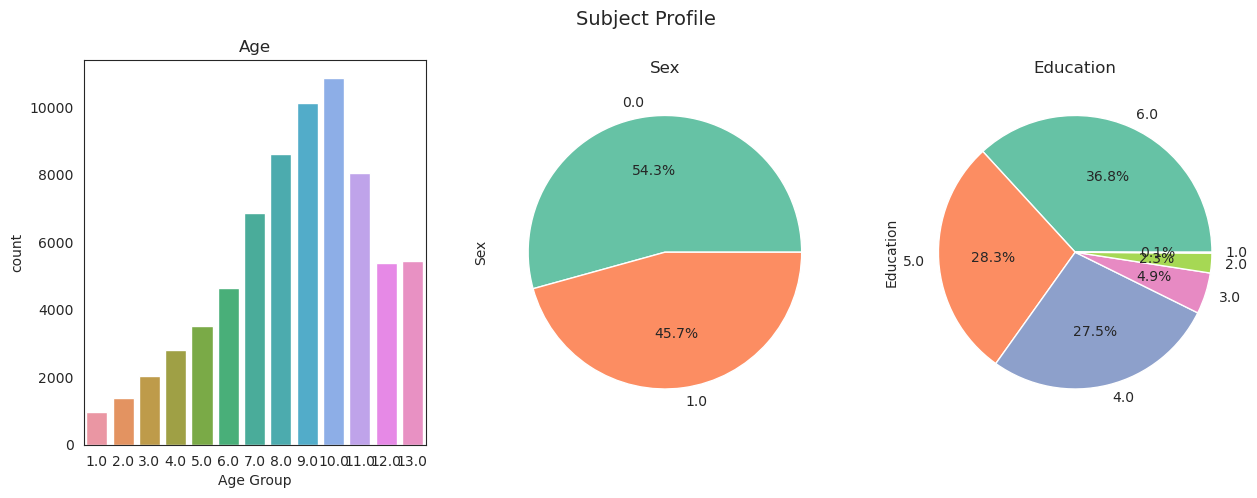

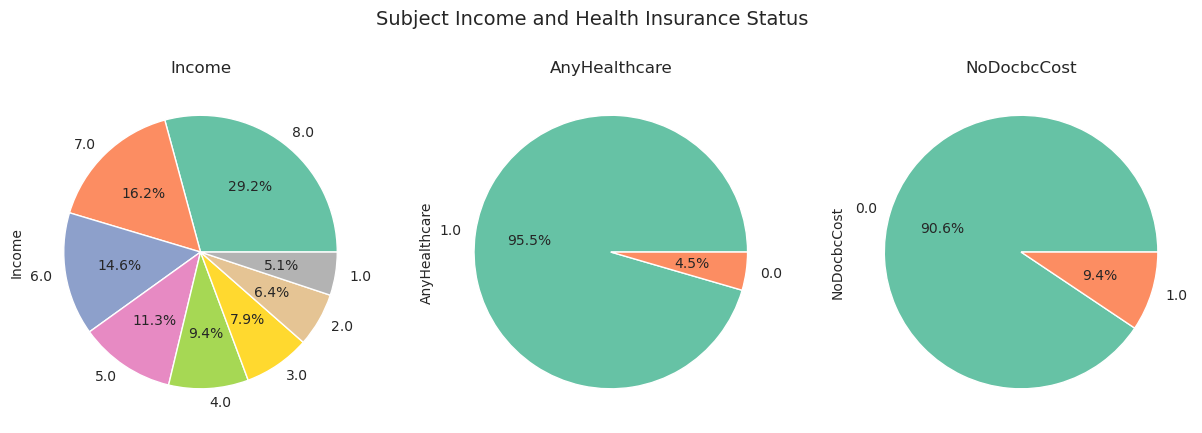

In [11]:
# Let's first check the social and economic status of the subjects

# what are the profile of all the subjects?
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes = axes.flatten()
sns.countplot(x='Age', data=train, ax=axes[0])
axes[0].set_title('Age')
axes[0].set_xlabel('Age Group')

for i, col in enumerate(['Sex', 'Education']):
    train[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i+1], title=col)
plt.suptitle('Subject Profile', fontsize=14)
plt.show()

# what are the
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()
for i, col in enumerate(['Income', 'AnyHealthcare', 'NoDocbcCost']):
    train[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i], title=col)
plt.suptitle('Subject Income and Health Insurance Status', fontsize=14)
plt.show()

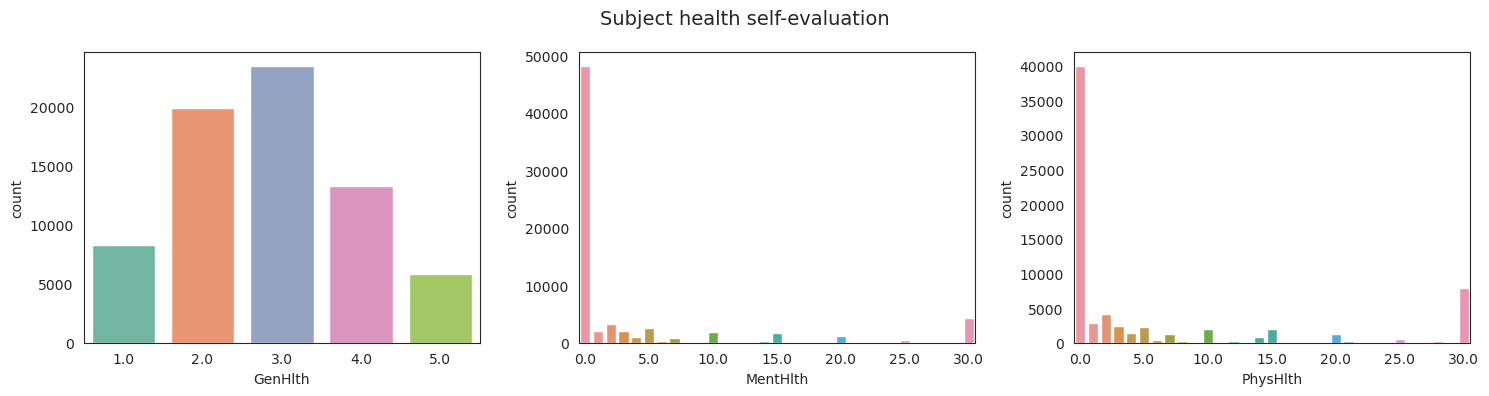

In [12]:
# how do they evaluate their health? plot distribution 
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.flatten()
for i, col in enumerate(cat_health):
    g = sns.countplot(x=col, data=train, ax=axes[i])
    if len(train[col].unique()) > 5:
        g.set_xticks(np.arange(0, len(train[col].unique()), 5))
plt.suptitle('Subject health self-evaluation', fontsize=14)
plt.tight_layout()
plt.show()

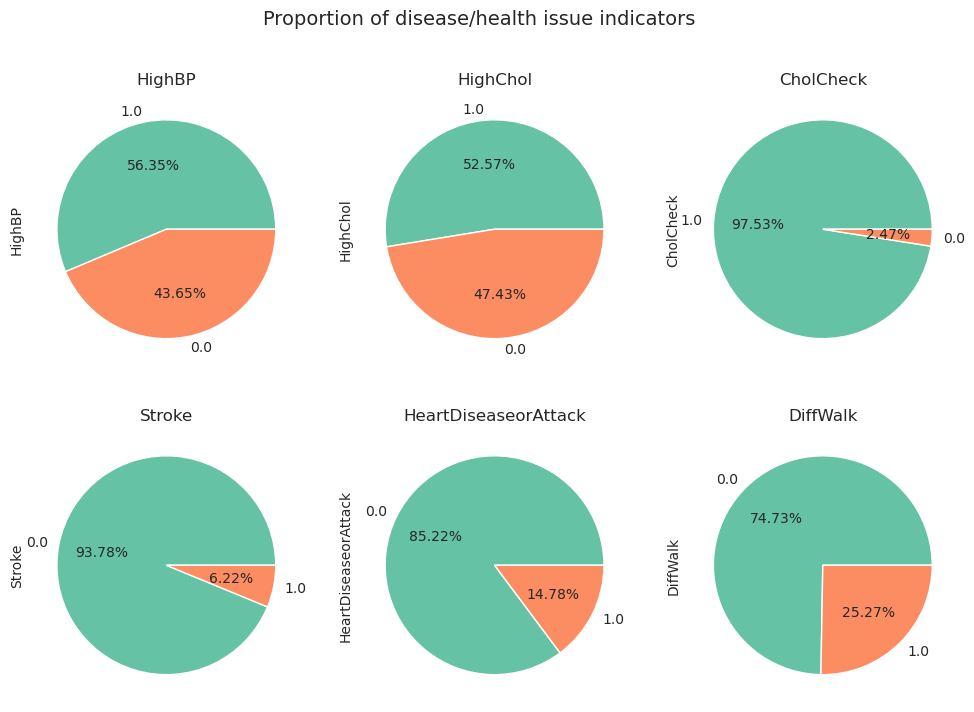

In [13]:
# let's check the distribution of binary health indicators using a pie chart
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for i, col in enumerate(cat_disease):
    train[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Proportion of disease/health issue indicators', fontsize=14)
plt.show()


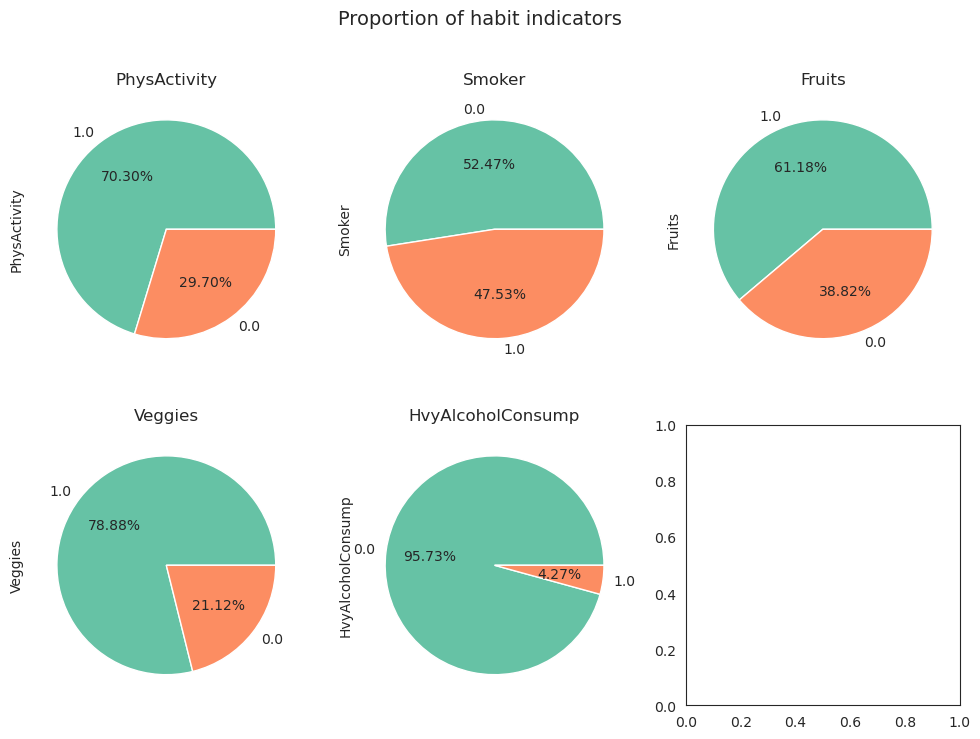

In [14]:
# now check the distribution of the habit indicators
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for i, col in enumerate(cat_habit):
    train[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Proportion of habit indicators', fontsize=14)
plt.show()


## Numerical variables

The only numerical variable analyzed in this section is the BMI index, although it is probably rounded to the nearest integer (thus they can be regarded as categorical variables in some sense).

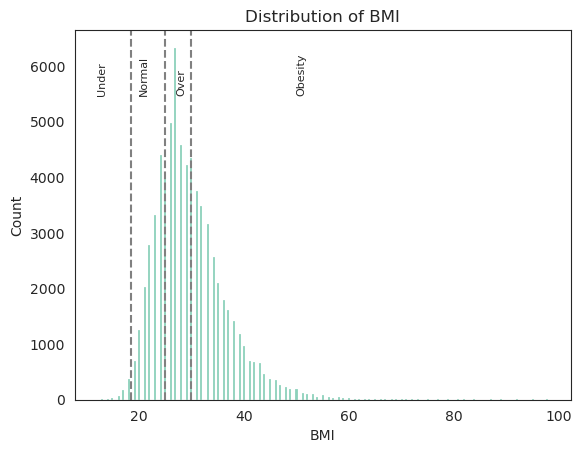

In [15]:
# plot the distribution of BMI  

# The World Health Organization (WHO) defines the following BMI ranges for adults:

# Underweight: BMI less than 18.5
# Normal weight: BMI between 18.5 and 24.9
# Overweight: BMI between 25 and 29.9
# Obesity: BMI of 30 or greater

plt.axvline(18.5, color='gray', linestyle='--')
plt.axvline(24.9, color='gray', linestyle='--')
plt.axvline(29.9, color='gray', linestyle='--')

# add text
plt.text(12, 5500, 'Under', rotation=90, size=8)
plt.text(20, 5500, 'Normal', rotation=90, size=8)
plt.text(27, 5500, 'Over', rotation=90, size=8)
plt.text(50, 5500, 'Obesity', rotation=90, size=8)

sns.histplot(train['BMI'], kde=False)

plt.title('Distribution of BMI')
plt.show()

# Relationship between features and target

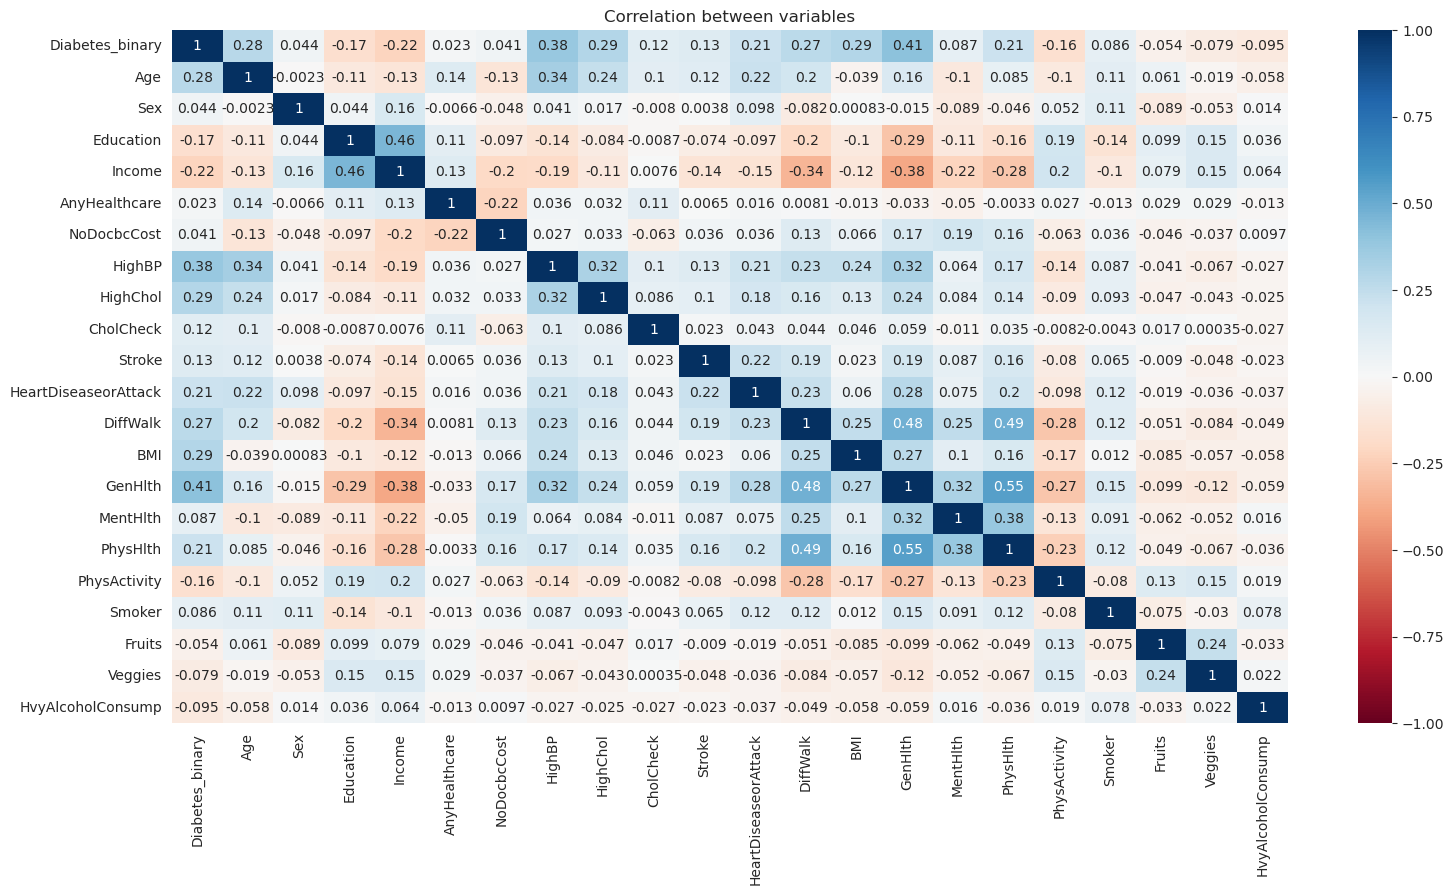

In [16]:
# plot a heatmap to check the correlation between the variables

# for better grouping and interpretation,sort columns by the list of columns created above
cols = ['Diabetes_binary'] + cat_socialecom + cat_disease +  ['BMI'] + cat_health + cat_habit

plt.figure(figsize=(18, 9))
# nomralize the color scale
sns.heatmap(train[cols].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation between variables')
plt.show()


In [17]:
# Top 15 variables that are correlated with the target variable - use absolute value to get the absolute correlation
train.corr()['Diabetes_binary'].abs().sort_values(ascending=False).head(15)


Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
Income                  0.224449
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Education               0.170481
PhysActivity            0.158666
Stroke                  0.125427
CholCheck               0.115382
HvyAlcoholConsump       0.094853
Name: Diabetes_binary, dtype: float64

## Most important indicators based on correlation results

Interesting! Diabetes looks positively correlated with the age and negatively correlated with income. 

It seems that subjects fairly evaluated their health status: if they think their health is poor, they are more likely to have diabetes. Similar correlation can be found between having diabetes amd  the evaluation about physical status.

The physical measures are correlated with diabetes, which is expected. High BP, high BMI, high Cholesterol are correlated with having diabetes. 

Health issues and diseases are more correlated with diabetes than the health habits. For example, the chance of having heart attack, stroke, or difficulties in walking is correlated with having diabetes. 

Among the health habits, whether having physical activity in past 30 days (`PhysActivity`) is the most correlated with diabetes (in a negative way).

Overall, correlation results show some indicators that are most effective in predicting diabetes. Note that it cannot imply causation. For example, the correlation between diabetes and BP is positive, but it does not mean that high BP causes diabetes. For the next step, we will use machine learning models to predict diabetes based on the indicators.

# Machine learning models
The target variable of the prediction is `Diabetes` (1 for (pre-)diabetes, 0 for non-diabetes). The feature variables are all the other variables. Therefore, the problem is a binary classification problem. I will try the following models to predict diabetes:

* Logistic regression
* Decision tree
* Random forest
* Support vector machine
* K-nearest neighbors
* Naive Bayes
* Gradient boosting


The model will be trained on the training data and tested on the test data. 

## Data preprocessing

In [18]:
# split the data into X and y
X = train.drop('Diabetes_binary', axis=1)
y = train['Diabetes_binary']

# split the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_test = test.drop('Diabetes_binary', axis=1)
y_test = test['Diabetes_binary']

In [19]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)



## Model fitting and evaluation

In [20]:
# create a function to evaluate the model

def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    df = pd.DataFrame({'train_accuracy': [accuracy_score(y_train, y_train_pred)],
                        'train_precision': [precision_score(y_train, y_train_pred)],
                        'train_recall': [recall_score(y_train, y_train_pred)],
                        'train_f1': [f1_score(y_train, y_train_pred)],
                        'train_roc_auc': [roc_auc_score(y_train, y_train_pred)],
                        
                        'val_accuracy': [accuracy_score(y_val, y_val_pred)],
                        'val_precision': [precision_score(y_val, y_val_pred)],
                        'val_recall': [recall_score(y_val, y_val_pred)],
                        'val_f1': [f1_score(y_val, y_val_pred)],
                        'val_roc_auc': [roc_auc_score(y_val, y_val_pred)]})
    return df


In [ ]:
# build a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# iterate through the dictionary and evaluate each model
results_l = []
for name, model in models.items():
    model_results = evaluate_model(model, X_train, y_train, X_val, y_val)
    model_results['model'] = name
    results_l.append(model_results)

# concatenate the results
results = pd.concat(results_l, axis=0).reset_index(drop=True)

In [ ]:
results.sort_values(by='val_accuracy', ascending=False)

Oops, the Random Forest and Decision Tree models seem overfitting: the accuracy score on the training data is much higher than that on the test data.

The Gradient Boosting model has the highest accuracy score and ROC AUC score on the test data. We will use this model to predict diabetes.

## Hyperparameter tuning
From the previous section, we can see that the best model is Gradient Boosting. Now, we will try to improve the model by tuning the hyperparameters. 

### RandomizedSearchCV

In [ ]:
# randomized search for hyperparameter tuning for gradient boosting

# define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.5, 0.7, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


# create the model
gb = GradientBoostingClassifier()

# create the randomized search
random_search = RandomizedSearchCV(gb, param_grid, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# fit the model
random_search.fit(X_train, y_train)

# print the best parameters
print(random_search.best_params_)

### GirdSearchCV

In [ ]:
# apply grid search to find the best parameters

# create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [4, 5, 6],
    'max_features': ['sqrt'],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [1, 2, 3],
    'n_estimators': [50, 100, 150],
}

# create the model
gb = GradientBoostingClassifier()

# create the grid search
grid_search = GridSearchCV(gb, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# fit the model
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)


In [ ]:
# evaluate the model with the best parameters
best_model = GradientBoostingClassifier(**grid_search.best_params_)
evaluate_model(best_model, X_train, y_train, X_val, y_val)


After hyperparameter tuning, the accuracy score and ROC AUC score on the validation data are slightly improved.


# Feature importance

In [ ]:
# plot the feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_model.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature importance of having diabetes')
plt.show()


In [ ]:
# the total importance of the top 8 features
feature_importance.head(8)['importance'].sum()

We can find that feature importance analysis results are roughly consistent with the correlation results.

# Predict test data

In [ ]:
# we have to remember that the data is imbalanced

# plot the portion of each class in the target variable as pie chart
plt.figure(figsize=(6, 6))
plt.pie(y_test.value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90)
plt.title('Portion of each class in the target variable')
plt.show()


In [ ]:
# predict the test set
y_test_pred = best_model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_test_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_test_pred)}')

# plot the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.yticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.title('Confusion matrix')
plt.show()

The model prediction looks okay, with 0.72 accuracy score. Note that the precision for the positive class (Diabetes) are very low. This is because the dataset is imbalanced. 

The ROC AUC score is 0.76, which is not bad. We can also find that in the check auc-roc curve.

In [ ]:
# plot the ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


# Conclusion

- What are the most important indicators for diabetes? 
    - Both correlation and feature importance analysis show that the most important indicators are:
        - Self-reported health status
        - High blood pressure
        - High BMI
        - High cholesterol
        - Age
        - DIfficulties in walking
        - Having heart disease or attack
        - Income

    - Interestingly, the health habits are not the most important indicators.

- By training a Gradient Boosting model, we can predict diabetes with 0.72 accuracy score after model selection and hyperparameter tuning.

- The indicators listed above together can contribute 91.5% to the performance of the model.


## Outlook
- In this project, I only used the balanced dataset to train and test the models. It would be also interesting to use the imbalanced dataset to train the model. In such a case, sampling methods such as SMOTE can be used to balance the dataset.
- It is interesting to think about the causation. Further analysis can be done to find out the causal relationship between the indicators and diabetes.
